# Feature Selection - Scikit-Learn Tutorial

### Author: Cindy Lu
**March 23, 2023**

## Why Feature Selection?

While a predictive model's performance tends to increase with more input variables, it reaches a point where noise is introduced and prolongs unncessary processing time with too many variables. Selecting only the features that are effectively contributing to the preditive power may enhance a model's performance and efficiency. Feature selection is a method to reduce the variables by using certain criteria to select variables that are most useful to predict the target by our model. In this tutorial, we will explore different feature selection methods and their applications using relevant tools in the scikit-learn package.

## Demonstration

**Load required packages**

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.ensemble import RandomForestClassifier

**Data Preparation**

In [2]:
cancer = datasets.load_breast_cancer()
X, y = cancer.data, cancer.target
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [3]:
# Plot the scatter plots (takes a long time)
df = pd.DataFrame(cancer.data, columns = cancer.feature_names)
# sns.pairplot(df)

![sns_pairplot](breast_cancer_sns_pairplot.png)

<Axes: >

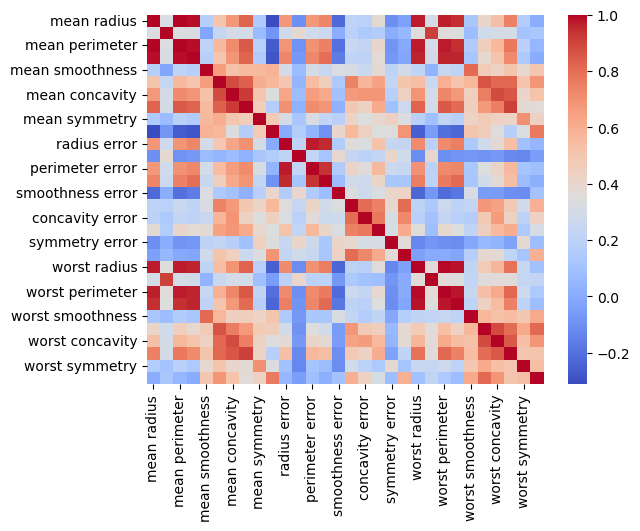

In [4]:
# Plot the correlation matrix using Seaborn's heatmap function
corr_matrix = df.corr()
sns.heatmap(corr_matrix, cmap='coolwarm')

In [5]:
# Scale the features
scaler = MinMaxScaler(feature_range=(0,1))
X_scaled = scaler.fit_transform(X)
print(X_scaled[0:5])

[[0.52103744 0.0226581  0.54598853 0.36373277 0.59375282 0.7920373
  0.70313964 0.73111332 0.68636364 0.60551811 0.35614702 0.12046941
  0.3690336  0.27381126 0.15929565 0.35139844 0.13568182 0.30062512
  0.31164518 0.18304244 0.62077552 0.14152452 0.66831017 0.45069799
  0.60113584 0.61929156 0.56861022 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 0.50159067 0.28987993 0.18176799
  0.20360825 0.34875746 0.37979798 0.14132266 0.15643672 0.08258929
  0.12444047 0.12565979 0.11938675 0.08132304 0.0469697  0.25383595
  0.08453875 0.0911101  0.60690146 0.30357143 0.53981772 0.43521431
  0.34755332 0.15456336 0.19297125 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 0.44941676 0.51430893 0.4310165
  0.46251172 0.63568588 0.50959596 0.21124684 0.22962158 0.09430251
  0.18037035 0.16292179 0.15083115 0.2839547  0.09676768 0.38984656
  0.20569032 0.12700551 0.55638563 0.36007463 0.50844166 0.37450845
  0.48358978 0.38537513 0.35974441 0.83505155 0.

### Feature Selection

* **Variance Threshold:**

VarianceThreshold is a simple feature selection method that removes all features whose variance does not meet a certain threshold. 

* Original Data (Unscaled):
In this case, we will use a threshold of 0.5, meaning the column(s) will be dropped if 50% of the values are similar.

In [6]:
VT_selector = VarianceThreshold(threshold=0.5)
VT_selector.fit_transform(X)

print(VT_selector.get_support())
print("Selected Features:" , cancer.feature_names[VT_selector.get_support()])

[ True  True  True  True False False False False False False False False
  True  True False False False False False False  True  True  True  True
 False False False False False False]
Selected Features: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'perimeter error' 'area error' 'worst radius' 'worst texture'
 'worst perimeter' 'worst area']


* Scaled Data:
Note that an error occured if the threshold is kept the same. Experiment with the threshold value to explore the data.

In [7]:
# Variance Threshold
VT_selector = VarianceThreshold(threshold=0.025)
VT_selector.fit_transform(X_scaled)

print(VT_selector.get_support())
print("Selected Features:" , cancer.feature_names[VT_selector.get_support()])

[ True False  True False False  True  True  True False False False False
 False False False False False False False False  True  True  True False
 False False  True  True False False]
Selected Features: ['mean radius' 'mean perimeter' 'mean compactness' 'mean concavity'
 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter'
 'worst concavity' 'worst concave points']


* True: High Variance
* False: Low Variance

This method is useful for removing constant or quasi-constant features, which are unlikely to be informative for the machine learning model.

* **SelectKBest**

SelectKBest is another simple feature selection method that selects the top k features based on a scoring function. Typically, `r_regression`, `f_regression`, `mutual_info_regression` functions are used for regression, and `chi2`, `f_classif`, `mutual_info_classifIn` functions are used for classification. In this case, we will use the chi-squared test to select the top 10 features:

In [8]:
KB_selector = SelectKBest(chi2, k=10)
KB_selector.fit_transform(X_scaled, y)
X_kbest = KB_selector.transform(X_scaled)
print("Selected Features:" , cancer.feature_names[KB_selector.get_support()])

Selected Features: ['mean radius' 'mean perimeter' 'mean area' 'mean concavity'
 'mean concave points' 'worst radius' 'worst perimeter' 'worst area'
 'worst concavity' 'worst concave points']


Comparing the SVM model performance with 2 sets of input features

In [9]:
# Original input dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=103)

model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy with 30 input features:", accuracy)

Accuracy with 30 input features: 0.9824561403508771


In [10]:
# Input dataset with selected features

# identify index of selected variables
index = [0,2,3,6,7,20,22,23,26,27]
X_select = X_scaled[:,index]
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=103)

model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy with 10 selected input features:", accuracy)

Accuracy with 10 selected input features: 0.9415204678362573


Note that using only the 10 selected feature may not always yield better accuracy.

* **Recursive Feature Elimination (RFE)**

Recursive Feature Elimination (RFE) is a feature selection method that recursively removes the least important features until a certain number of features is reached. Supervised learning algorithms with a `fit` method (i.e. provides information about feature importance e.g. coef_, feature_importances_) can be used to set the `estimator` instance. We will experiment with SVM and Logistic Regression.

* SVM

In [11]:
RFE_estimator = SVC(kernel="linear")
RFE_selector = RFE(RFE_estimator, n_features_to_select=10)
RFE_selector.fit_transform(X_scaled, y)
print("Selected Features:" , cancer.feature_names[RFE_selector.get_support()])

# use `ranking_` to retrieve the rank of the features - 1 being the best and selected
RFE_selector.ranking_

Selected Features: ['mean radius' 'mean area' 'mean concave points' 'worst radius'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst concave points' 'worst symmetry']


array([ 1,  3,  4,  1, 13, 12,  5,  1, 11,  8,  2, 17,  7, 10, 14,  6, 18,
       19, 20, 15,  1,  1,  1,  1,  1, 21,  9,  1,  1, 16])

In [12]:
# ML Performance

index = [0,3,7,20,21,22,23,24,27,28]
X_select = X_scaled[:,index]
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=5)

# SVM
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("SVM accuracy:", accuracy)

# LR
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("LR accuracy:", accuracy)

SVM accuracy: 0.9824561403508771
LR accuracy: 0.9766081871345029


* Logistic Regression

In [13]:
RFE_estimator = LogisticRegression(max_iter=10000)
RFE_selector = RFE(RFE_estimator, n_features_to_select=10)
RFE_selector.fit_transform(X_scaled, y)
print("Selected Features:" , cancer.feature_names[RFE_selector.get_support()])
RFE_selector.ranking_

Selected Features: ['mean radius' 'mean perimeter' 'mean concave points' 'worst radius'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst concavity' 'worst concave points']


array([ 1,  3,  1,  2, 11, 15,  6,  1, 14,  9,  5, 21,  7,  8, 20, 13, 17,
       18, 19, 12,  1,  1,  1,  1,  1, 10,  1,  1,  4, 16])

In [14]:
# ML Performance

index = [0,5,6,11,20,24,25,26,27,28]
X_select = X_scaled[:,index]
X_train, X_test, y_train, y_test = train_test_split(X_select, y, test_size=0.3, random_state=5)

# LR
model_LR = LogisticRegression(max_iter=10000)
model_LR.fit(X_train, y_train)
y_pred = model_LR.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("LR accuracy:", accuracy)

# SVM
model_SVC = SVC(kernel='linear')
model_SVC.fit(X_train, y_train)
y_pred = model_SVC.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("SVM accuracy:", accuracy)

LR accuracy: 0.9590643274853801
SVM accuracy: 0.9649122807017544


* **SelectFromModel**

SelectFromModel is a feature selection method that selects the features with non-zero coefficients from a specified estimator, which can be both a fitted or a non-fitted estimator, but should have a `_feature_importances_` or `coef_` attribute. We will experiment with the same 2 estimators as in previous examples.

* Logistics Regression

In [15]:
# LR

SFM_estimator = LogisticRegression(max_iter=10000)
SFM_selector = SelectFromModel(SFM_estimator, max_features=10)
SFM_selector.fit_transform(X_scaled, y)
# SFM_selector.fit_transform(X, y)
print("Selected Features from LR:" , cancer.feature_names[SFM_selector.get_support()])

Selected Features from LR: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean concave points' 'worst radius' 'worst texture' 'worst perimeter'
 'worst area' 'worst concave points']


Compare selected features from Recursive Feature Elimination (RFE) using LR

In [16]:
# Compare with RFE using LR
print("Selected Features from LR:" , cancer.feature_names[RFE_selector.get_support()])

Selected Features from LR: ['mean radius' 'mean perimeter' 'mean concave points' 'worst radius'
 'worst texture' 'worst perimeter' 'worst area' 'worst smoothness'
 'worst concavity' 'worst concave points']


* SVM

In [17]:
SFM_estimator = SVC(kernel="linear")
SFM_selector = SelectFromModel(SFM_estimator, max_features=10)
SFM_selector.fit_transform(X_scaled, y)
SFM_selector.fit_transform(X, y)
print("Selected Features from SVM:")
SFM_selector.get_feature_names_out(cancer.feature_names)

Selected Features from SVM:


array(['mean radius', 'mean concavity', 'mean concave points',
       'texture error', 'perimeter error', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype=object)

* Compare ML Performance

In [18]:
# Comparing ML Performance

index_LR = [0,1,2,3,7,20,21,22,23,27]
index_SVM = [0,6,7,11,12,24,25,26,27,28]
X_select_LR = X_scaled[:,index_LR]
X_select_SVM = X_scaled[:,index_SVM]
# print(X_select[0:5])
X_train_LR, X_test_LR, y_train_LR, y_test_LR = train_test_split(X_select_LR, y, test_size=0.3, random_state=5)
X_train_SVM, X_test_SVM, y_train_SVM, y_test_SVM = train_test_split(X_select_SVM, y, test_size=0.3, random_state=5)

model_LR_LR = LogisticRegression(max_iter=10000)
model_LR_LR.fit(X_train_LR, y_train_LR)
y_pred_LR_LR = model_LR_LR.predict(X_test_LR)
accuracy = metrics.accuracy_score(y_test_LR, y_pred_LR_LR)
print("LR model with LR feature selection accuracy:", accuracy)

model_SVM_LR = SVC(kernel='linear')
model_SVM_LR.fit(X_train_LR, y_train_LR)
y_pred_SVM_LR = model_SVM_LR.predict(X_test_LR)
accuracy = metrics.accuracy_score(y_test_LR, y_pred_SVM_LR)
print("SVM model with LR feature selection  accuracy:", accuracy)

model_LR_SVM = LogisticRegression(max_iter=10000)
model_LR_SVM.fit(X_train_SVM, y_train_SVM)
y_pred_LR_SVM = model_LR_SVM.predict(X_test_SVM)
accuracy = metrics.accuracy_score(y_test_SVM, y_pred_LR_SVM)
print("SVM model with SVM feature selection accuracy:", accuracy)

model_SVM_SVM = SVC(kernel='linear')
model_SVM_SVM.fit(X_train_SVM, y_train_SVM)
y_pred_SVM_SVM = model_SVM_SVM.predict(X_test_SVM)
accuracy = metrics.accuracy_score(y_test_SVM, y_pred_SVM_SVM)
print("LR model with SVM feature selection accuracy:", accuracy)

LR model with LR feature selection accuracy: 0.9824561403508771
SVM model with LR feature selection  accuracy: 0.9824561403508771
SVM model with SVM feature selection accuracy: 0.9473684210526315
LR model with SVM feature selection accuracy: 0.9532163742690059


* **Sequential Feature Selector**

Sequential Feature Selector is a greedy feature selection method that selects features in a forward or backward manner. In this case, we will use SequentialFeatureSelector with a random forest classifier estimator to select the top 10 features:

In [19]:
SFS_estimator = RandomForestClassifier(n_estimators=100, random_state=42)
SFS_selector = SequentialFeatureSelector(SFS_estimator, n_features_to_select=10, direction='forward')
SFS_selector.fit_transform(X_scaled, y)

print("Selected Features:" , cancer.feature_names[SFS_selector.get_support()])

Selected Features: ['mean texture' 'mean area' 'smoothness error' 'symmetry error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst smoothness'
 'worst concavity' 'worst fractal dimension']


### Feature Selection as part of a Pipeline

The purpose of a pipeline is to assemble several steps while setting different parameters. In the following example, feature scaling, selection, and classification steps are fed into the pipeline and ran all at once.

In [20]:
from sklearn.pipeline import Pipeline
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=103)

clf = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
  ('feature_selection', SelectFromModel(SVC(kernel="linear"))),
  ('classification', SVC())
])
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.9824561403508771

Without Feature Selection:

In [21]:
clf1 = Pipeline([
  ('scaler', MinMaxScaler(feature_range=(0,1))),
  ('classification', SVC())
])
clf1.fit(X_train, y_train)
clf1.score(X_test, y_test)

0.9766081871345029

## Summary

When working with a dataset with multiple dimensions / variables, feature selection can help achieve a balance between accuracy and processing effort. As seen in several examples above, using selected features in current settings may not always yield the best accuracy. Depending on the goal for the model, fine-tuning the feature selection parameters (e.g. number of features, thresholds, estimators) may be necessary to determine the best model performance. 

## References:

* https://scikit-learn.org/stable/modules/feature_selection.html
* https://towardsdatascience.com/5-feature-selection-method-from-scikit-learn-you-should-know-ed4d116e4172
* https://www.datacamp.com/tutorial/feature-selection-python
* https://machinelearningmastery.com/feature-selection-in-python-with-scikit-learn/
* https://medium.com/nerd-for-tech/removing-constant-variables-feature-selection-463e2d6a30d9